In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import scipy.stats as sps
import seaborn as sns

In [2]:
df = pd.read_csv('coursework_1_data_2019.csv')
# df

In [3]:
# df.info()
round(df.describe(), 2)

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,...,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00,152.00
mean,1075.30,1159.51,1278.61,340922.32,354282.09,368289.48,375.80,401.53,438.28,166914.75,...,174007.57,182291.48,191112.50,270309.21,59368.42,68427.63,25111.84,62631.58,32967.11,21802.63
std,922.38,997.23,1069.69,262135.39,278874.47,294596.86,323.56,353.76,376.48,128635.27,...,133527.50,142585.69,149675.48,210461.78,53980.95,62115.00,22815.28,55056.10,29930.25,19832.42
min,5.00,1.00,4.00,2200.00,2385.00,2440.00,2.00,0.00,1.00,1085.00,...,1115.00,1080.00,1014.00,2000.00,0.00,0.00,0.00,2000.00,0.00,0.00
25%,493.50,531.75,592.50,189474.75,188067.25,193428.50,175.75,183.25,198.25,93000.25,...,95983.75,99307.25,101902.75,140000.00,26000.00,32000.00,11750.00,31750.00,14000.00,9000.00
50%,729.00,794.50,873.50,254092.50,257771.50,264203.50,266.00,271.00,293.50,122694.00,...,128675.50,135104.00,140668.50,200000.00,41500.00,48000.00,18000.00,45000.00,25000.00,16000.00
75%,1386.00,1470.25,1641.50,375122.50,402499.00,409428.50,473.75,519.25,554.75,183610.00,...,191395.50,197497.75,213147.75,301750.00,70000.00,79000.00,26500.00,69750.00,39750.00,27250.00
max,5065.00,5582.00,5745.00,1411380.00,1528154.00,1623387.00,1762.00,2065.00,2000.00,694681.00,...,716699.00,773508.00,832527.00,1170000.00,297000.00,333000.00,130000.00,340000.00,203000.00,99000.00


#### Boxplot

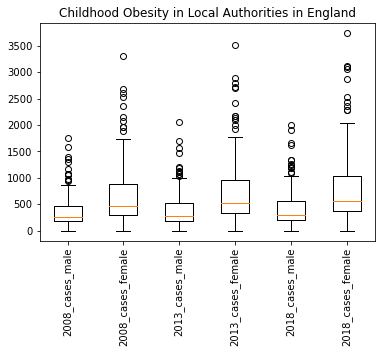

<Figure size 432x288 with 0 Axes>

In [4]:
plt.boxplot(df[['2008_cases_male', '2008_cases_female', 
                '2013_cases_male', '2013_cases_female',
                '2018_cases_male', '2018_cases_female']], 
            labels=['2008_cases_male', '2008_cases_female',
                    '2013_cases_male', '2013_cases_female',
                    '2018_cases_male', '2018_cases_female'])
plt.title("Childhood Obesity in Local Authorities in England")
plt.xticks(rotation=90)
plt.show()

#### Normalise Data

In [5]:
df["2008_cases_per_100k"] = df["2008_cases_total"] / df["2008_pop_total"] * 100000
df["2013_cases_per_100k"] = df["2013_cases_total"] / df["2013_pop_total"] * 100000


df["2018_cases_per_100k"] = df["2018_cases_total"] / df["2018_pop_total"] * 100000

In [6]:
spending_categories = ['clean_air', 'clean_environ', 'health_training',
                      'school_awareness', 'media_awareness', 'sub_counselling']

for c in spending_categories:
    new_name = '2018_' + c
    df[new_name] = df[c]/df['2018_pop_total'] * 100000

# df

In [7]:
df["2018_spending_per_pax"] = df["total_budget"]/df["2018_pop_total"]

In [8]:
df

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2008_cases_per_100k,2013_cases_per_100k,2018_cases_per_100k,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_spending_per_pax
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,343.401821,345.752109,419.740454,11552.489562,12102.608112,9902.133910,22554.860572,9902.133910,10452.252460,0.764665
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,158.326847,172.643303,217.162282,14046.719389,4775.884592,6461.490919,20789.144695,8428.031633,7304.294082,0.618056
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,158.761659,184.828491,204.356239,15898.682736,17449.773735,1938.863748,10082.091491,11245.409740,5428.818495,0.620436
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,255.283415,243.387773,260.914574,17429.516093,22183.020482,10035.175932,26408.357717,5281.671543,3697.170080,0.850349
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,196.605241,198.413902,215.295988,21705.590069,30505.153611,9972.838681,4693.100556,1759.912708,7626.288403,0.762629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,824.131604,849.613317,872.881356,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144,0.610754
148,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,74.003594,88.065868,101.387631,11998.536179,24596.999166,7799.048516,11398.609370,5999.268089,3599.560854,0.653920
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,601.474907,623.123391,654.453732,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359,0.761257
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,486.108006,505.137184,508.297322,20099.492488,17587.055927,8950.555248,11934.073665,10520.828099,4710.818552,0.738028


#### Remove Outlier
(City of London)

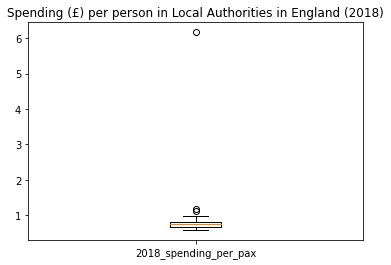

In [9]:
plt.boxplot(df['2018_spending_per_pax'],
            labels=['2018_spending_per_pax'])
plt.title("Spending (£) per person in Local Authorities in England (2018)")
plt.show()

In [10]:
df.loc[df['2018_spending_per_pax'] > 1]

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2008_cases_per_100k,2013_cases_per_100k,2018_cases_per_100k,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_spending_per_pax
25,City of London,16,14,12,11378,9838,8107,5,3,3,...,140.622253,142.305347,148.020229,148020.229431,111015.172074,74010.114716,246700.382386,24670.038239,12335.019119,6.167510
105,Rutland,88,102,86,38363,39872,42952,28,23,26,...,229.387691,255.818620,200.223505,39579.065003,11640.901471,18625.442354,32594.524120,11640.901471,4656.360589,1.187372
133,Tower Hamlets,569,505,605,228366,193835,187282,191,159,199,...,249.161434,260.530864,323.042257,19222.349185,37376.790081,11213.037024,23493.982337,11213.037024,9611.174592,1.121304


In [11]:
df = df.drop([25])
df

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2008_cases_per_100k,2013_cases_per_100k,2018_cases_per_100k,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_spending_per_pax
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,343.401821,345.752109,419.740454,11552.489562,12102.608112,9902.133910,22554.860572,9902.133910,10452.252460,0.764665
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,158.326847,172.643303,217.162282,14046.719389,4775.884592,6461.490919,20789.144695,8428.031633,7304.294082,0.618056
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,158.761659,184.828491,204.356239,15898.682736,17449.773735,1938.863748,10082.091491,11245.409740,5428.818495,0.620436
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,255.283415,243.387773,260.914574,17429.516093,22183.020482,10035.175932,26408.357717,5281.671543,3697.170080,0.850349
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,196.605241,198.413902,215.295988,21705.590069,30505.153611,9972.838681,4693.100556,1759.912708,7626.288403,0.762629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,824.131604,849.613317,872.881356,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144,0.610754
148,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,74.003594,88.065868,101.387631,11998.536179,24596.999166,7799.048516,11398.609370,5999.268089,3599.560854,0.653920
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,601.474907,623.123391,654.453732,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359,0.761257
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,486.108006,505.137184,508.297322,20099.492488,17587.055927,8950.555248,11934.073665,10520.828099,4710.818552,0.738028


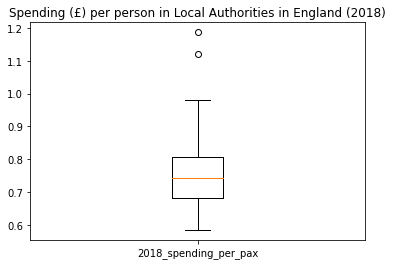

In [12]:
plt.boxplot(df['2018_spending_per_pax'],
            labels=['2018_spending_per_pax'])
plt.title("Spending (£) per person in Local Authorities in England (2018)")
plt.show()

#### Regression of total cases against total population

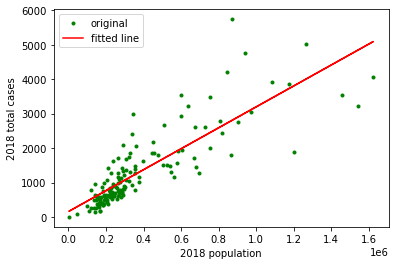

y = 0.003 x + 159.575
Rsq = 0.7012157457499871
p-value = 6.377118187000331e-41


In [13]:
X = df['2018_pop_total']
Y = df['2018_cases_total']

a = plt.plot(X, Y, 'g.', label='original')
plt.xlabel('2018 population')
plt.ylabel('2018 total cases')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line') # Plot the regression line
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq =", r_value**2)
print("p-value =", p_value)

#### Pairwise scatter plots

In [14]:
spending_df = pd.concat([df['2018_clean_air'], df['2018_clean_environ'],
                         df['2018_health_training'], df['2018_school_awareness'],
                         df['2018_media_awareness'], df['2018_sub_counselling'], 
                         df['2018_cases_per_100k']],
                         axis=1)
spending_df

,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_cases_per_100k
0,11552.489562,12102.608112,9902.133910,22554.860572,9902.133910,10452.252460,419.740454
1,14046.719389,4775.884592,6461.490919,20789.144695,8428.031633,7304.294082,217.162282
2,15898.682736,17449.773735,1938.863748,10082.091491,11245.409740,5428.818495,204.356239
3,17429.516093,22183.020482,10035.175932,26408.357717,5281.671543,3697.170080,260.914574
4,21705.590069,30505.153611,9972.838681,4693.100556,1759.912708,7626.288403,215.295988
...,...,...,...,...,...,...,...
147,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144,872.881356
148,11998.536179,24596.999166,7799.048516,11398.609370,5999.268089,3599.560854,101.387631
149,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359,654.453732
150,20099.492488,17587.055927,8950.555248,11934.073665,10520.828099,4710.818552,508.297322


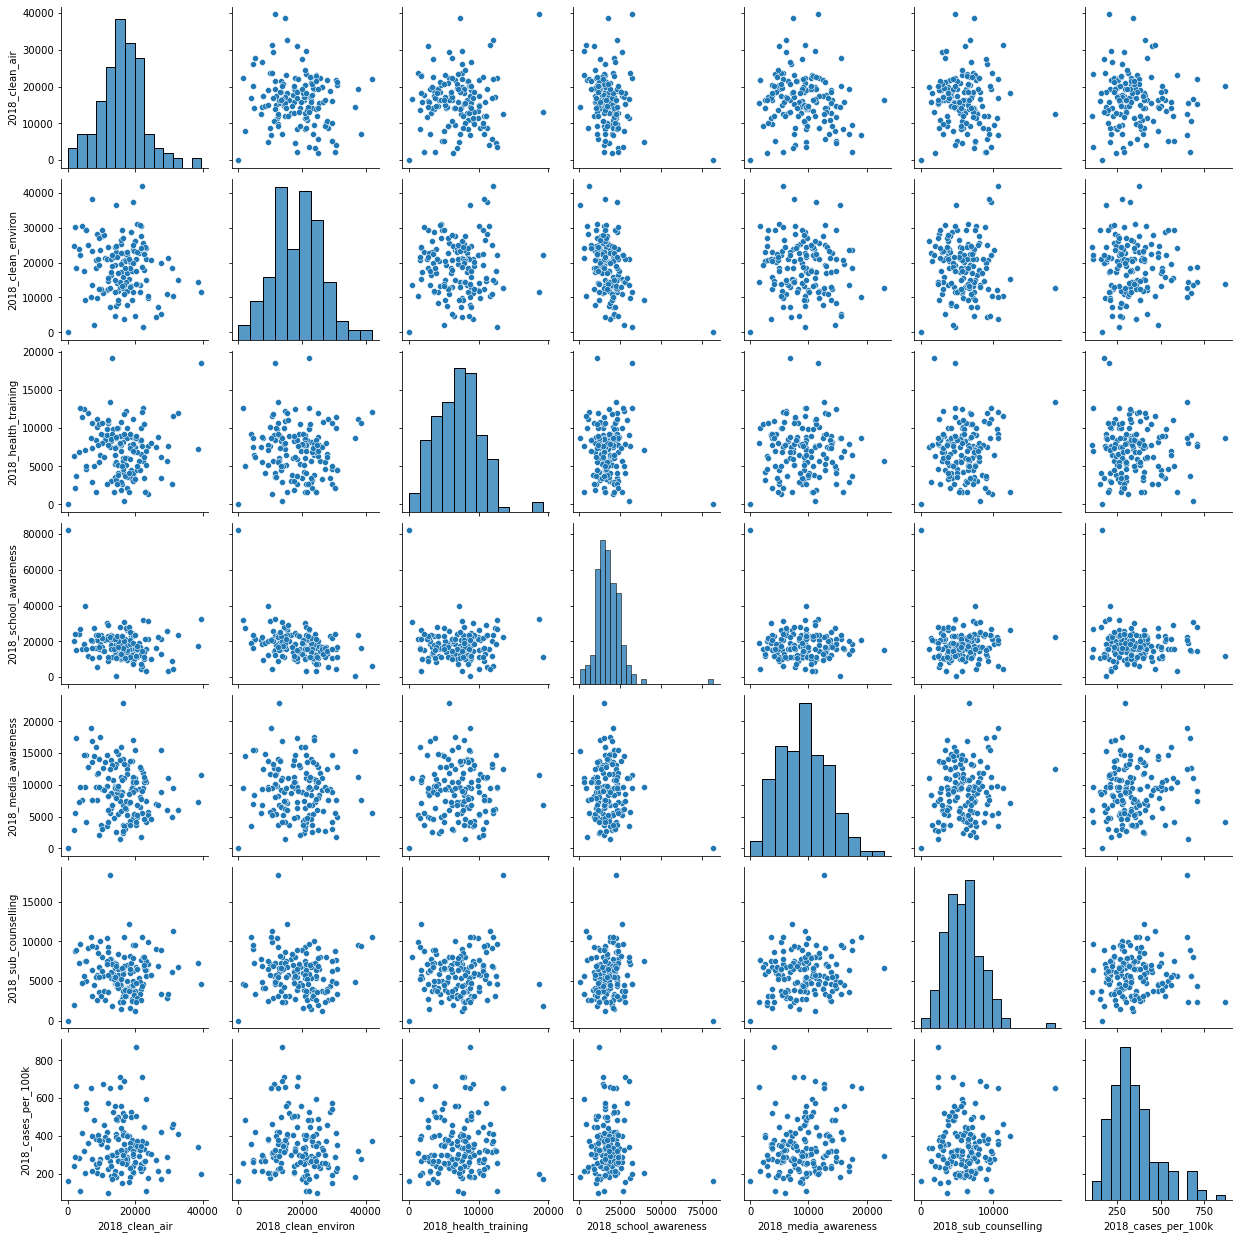

In [15]:
sns.pairplot(spending_df)

In [16]:
#possible outlier?
df.loc[df['2018_school_awareness'] > 75000]

#it is just a very small local authority
#so i will keep it in the data

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2008_cases_per_100k,2013_cases_per_100k,2018_cases_per_100k,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_spending_per_pax
59,Isles of Scilly,5,1,4,2200,2385,2440,2,0,1,...,227.272727,41.928721,163.934426,0.0,0.0,0.0,81967.213115,0.0,0.0,0.819672


In [17]:
df.loc[df['2018_sub_counselling'] > 15000]
#slough

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2008_cases_per_100k,2013_cases_per_100k,2018_cases_per_100k,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_spending_per_pax
111,Slough,777,773,779,126669,119952,119201,282,244,254,...,613.409753,644.424436,653.518007,12583.787049,12583.787049,13422.706185,22650.816688,12583.787049,18456.221005,0.922811


In [18]:
# no clear reason for removing these points, so i will keep them
df.loc[df['2018_cases_per_100k'] > 600]

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2008_cases_per_100k,2013_cases_per_100k,2018_cases_per_100k,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_spending_per_pax
7,Blackburn with Darwen,831,818,962,140363,134228,142219,265,265,291,...,592.036363,609.410853,676.421575,10547.113958,11250.254889,9140.832097,14765.959541,12656.536750,5625.127444,0.639858
91,Nottingham,2098,2226,2080,298648,310011,292387,731,692,599,...,702.499263,718.039037,711.385937,15390.561140,14364.523731,7866.286805,28045.022522,7524.274335,2394.087288,0.755848
92,Nottinghamshire,5065,5582,5745,778640,862292,870182,1762,2065,2000,...,650.493168,647.344519,660.206715,15399.077434,14479.729528,8044.294182,19076.469060,1493.940348,2298.369766,0.607919
106,Salford,1469,1442,1618,224540,219980,234745,546,530,554,...,654.226418,655.514138,689.258557,16613.772391,13631.813244,425.994164,30671.579799,11075.848261,8093.889114,0.805129
111,Slough,777,773,779,126669,119952,119201,282,244,254,...,613.409753,644.424436,653.518007,12583.787049,12583.787049,13422.706185,22650.816688,12583.787049,18456.221005,0.922811
144,Wigan,2017,2251,2415,307509,342059,339861,844,938,978,...,655.915762,658.073607,710.584621,22067.845384,18831.228061,7650.186400,14417.658984,9121.376092,4413.569077,0.765019
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,824.131604,849.613317,872.881356,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144,0.610754
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,601.474907,623.123391,654.453732,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359,0.761257
151,York,1170,1266,1414,196246,202851,212083,450,463,518,...,596.190496,624.103406,666.720105,2357.567556,18389.026938,3772.108090,15088.432359,17445.999915,8958.756713,0.660119


In [19]:
round(spending_df.describe(), 2)

,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_cases_per_100k
count,151.00,151.00,151.00,151.00,151.00,151.00,151.00
mean,16209.26,18696.62,7092.45,17984.01,9090.77,5870.28,345.98
std,6831.55,7629.97,3279.75,8310.93,4098.43,2579.05,138.24
min,0.00,0.00,0.00,430.84,0.00,0.00,101.39
25%,12037.44,13016.58,4671.97,13033.09,5938.72,3868.52,255.69
50%,16272.49,19350.41,7358.48,17053.79,9260.59,5739.67,320.53
75%,20081.12,23720.96,8932.01,21626.78,11791.50,7293.16,407.21
max,39579.07,41915.90,19176.40,81967.21,22976.82,18456.22,872.88


#### Encode Categorical Variables

In [20]:
mlr_df = pd.concat([df['2018_clean_air'], df['2018_clean_environ'],
                    df['2018_health_training'], df['2018_school_awareness'],
                    df['2018_media_awareness'], df['2018_sub_counselling'], 
                    df['region'], df['local_authority_type'], 
                    df['2018_cases_per_100k']],
                    axis=1)
mlr_df

,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,region,local_authority_type,2018_cases_per_100k
0,11552.489562,12102.608112,9902.133910,22554.860572,9902.133910,10452.252460,London,london_borough,419.740454
1,14046.719389,4775.884592,6461.490919,20789.144695,8428.031633,7304.294082,London,london_borough,217.162282
2,15898.682736,17449.773735,1938.863748,10082.091491,11245.409740,5428.818495,Yorkshire and the Humber,metropolitan_borough,204.356239
3,17429.516093,22183.020482,10035.175932,26408.357717,5281.671543,3697.170080,South West,unitary_authority,260.914574
4,21705.590069,30505.153611,9972.838681,4693.100556,1759.912708,7626.288403,East of England,unitary_authority,215.295988
...,...,...,...,...,...,...,...,...,...
147,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144,North West,metropolitan_borough,872.881356
148,11998.536179,24596.999166,7799.048516,11398.609370,5999.268089,3599.560854,South East,unitary_authority,101.387631
149,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359,West Midlands,metropolitan_borough,654.453732
150,20099.492488,17587.055927,8950.555248,11934.073665,10520.828099,4710.818552,West Midlands,non_metropolitan_county,508.297322


In [21]:
mlr_df = pd.get_dummies(mlr_df)
mlr_df

#9 regions
#4 local authority types

,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_cases_per_100k,region_East Midlands,region_East of England,region_London,region_North East,region_North West,region_South East,region_South West,region_West Midlands,region_Yorkshire and the Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_unitary_authority
0,11552.489562,12102.608112,9902.133910,22554.860572,9902.133910,10452.252460,419.740454,0,0,1,0,0,0,0,0,0,1,0,0,0
1,14046.719389,4775.884592,6461.490919,20789.144695,8428.031633,7304.294082,217.162282,0,0,1,0,0,0,0,0,0,1,0,0,0
2,15898.682736,17449.773735,1938.863748,10082.091491,11245.409740,5428.818495,204.356239,0,0,0,0,0,0,0,0,1,0,1,0,0
3,17429.516093,22183.020482,10035.175932,26408.357717,5281.671543,3697.170080,260.914574,0,0,0,0,0,0,1,0,0,0,0,0,1
4,21705.590069,30505.153611,9972.838681,4693.100556,1759.912708,7626.288403,215.295988,0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144,872.881356,0,0,0,0,1,0,0,0,0,0,1,0,0
148,11998.536179,24596.999166,7799.048516,11398.609370,5999.268089,3599.560854,101.387631,0,0,0,0,0,1,0,0,0,0,0,0,1
149,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359,654.453732,0,0,0,0,0,0,0,1,0,0,1,0,0
150,20099.492488,17587.055927,8950.555248,11934.073665,10520.828099,4710.818552,508.297322,0,0,0,0,0,0,0,1,0,0,0,1,0


In [22]:
# use East Midlands region and non_metropolitan_county as reference levels
mlr_df = mlr_df.drop(['region_East Midlands', 'local_authority_type_non_metropolitan_county'], axis=1)
mlr_df

,2018_clean_air,2018_clean_environ,2018_health_training,2018_school_awareness,2018_media_awareness,2018_sub_counselling,2018_cases_per_100k,region_East of England,region_London,region_North East,region_North West,region_South East,region_South West,region_West Midlands,region_Yorkshire and the Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_unitary_authority
0,11552.489562,12102.608112,9902.133910,22554.860572,9902.133910,10452.252460,419.740454,0,1,0,0,0,0,0,0,1,0,0
1,14046.719389,4775.884592,6461.490919,20789.144695,8428.031633,7304.294082,217.162282,0,1,0,0,0,0,0,0,1,0,0
2,15898.682736,17449.773735,1938.863748,10082.091491,11245.409740,5428.818495,204.356239,0,0,0,0,0,0,0,1,0,1,0
3,17429.516093,22183.020482,10035.175932,26408.357717,5281.671543,3697.170080,260.914574,0,0,0,0,0,1,0,0,0,0,1
4,21705.590069,30505.153611,9972.838681,4693.100556,1759.912708,7626.288403,215.295988,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,20163.646990,13734.658095,8766.803039,11981.297487,4091.174752,2337.814144,872.881356,0,0,0,1,0,0,0,0,0,1,0
148,11998.536179,24596.999166,7799.048516,11398.609370,5999.268089,3599.560854,101.387631,0,0,0,0,1,0,0,0,0,0,1
149,6817.226374,10225.839560,8710.900366,20830.413919,18936.739927,10604.574359,654.453732,0,0,0,0,0,0,1,0,0,1,0
150,20099.492488,17587.055927,8950.555248,11934.073665,10520.828099,4710.818552,508.297322,0,0,0,0,0,0,1,0,0,0,0


#### Correlation Matrix

<AxesSubplot:>

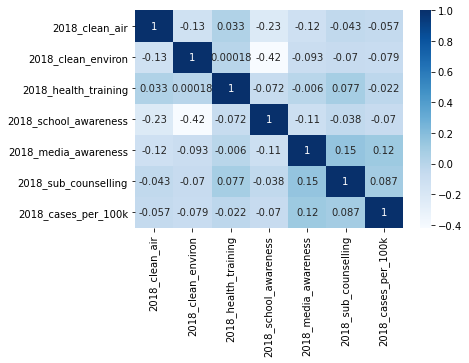

In [23]:
sns.heatmap(spending_df.corr(), annot = True, cmap = "Blues")

Text(0.5, 1.0, 'Correlation Matrix')

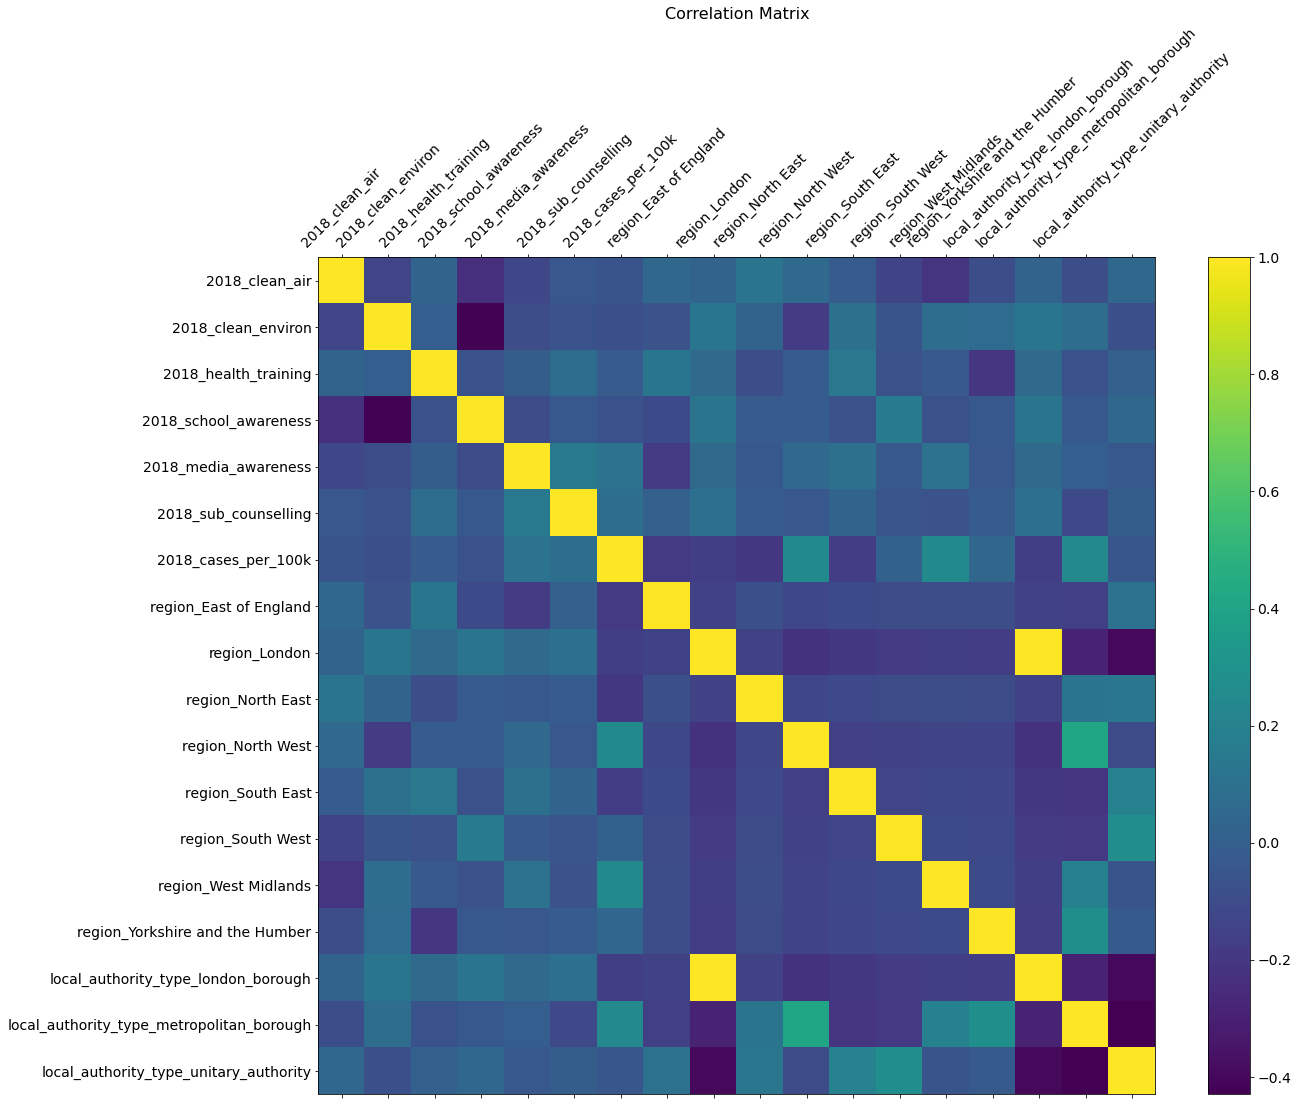

In [24]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(mlr_df.corr(), fignum=f.number)
plt.xticks(range(mlr_df.shape[1]), mlr_df.columns, fontsize=14, rotation=45)
plt.yticks(range(mlr_df.shape[1]), mlr_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

#### Dealing with Multicollinearity

In [25]:
# calculating VIF
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [26]:
mlr_new = drop_column_using_vif_(mlr_df.drop('2018_cases_per_100k', axis=1))

Dropping: region_London


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [32]:
model_mlr = sms.OLS(endog=mlr_df[['2018_cases_per_100k']], exog=sms.add_constant(mlr_new)).fit()
model_mlr.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     2018_cases_per_100k   R-squared:                       0.297
Model:                             OLS   Adj. R-squared:                  0.213
Method:                  Least Squares   F-statistic:                     3.539
Date:                 Mon, 15 Nov 2021   Prob (F-statistic):           2.65e-05
Time:                         15:15:08   Log-Likelihood:                -931.42
No. Observations:                  151   AIC:                             1897.
Df Residuals:                      134   BIC:                             1948.
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       444.6706     95.045      4.679      0.000     256.689     632.653
2018_clean_air                               -0.0008      0.002     -0.477      0.634      -0.004       0.003
2018_clean_environ                           -0.0011      0.002     -0.648      0.518      -0.004       0.002
2018_health_training                         -0.0001      0.003     -0.045      0.965      -0.007       0.006
2018_school_awareness                        -0.0017      0.002     -1.104      0.271      -0.005       0.001
2018_media_awareness                          0.0021      0.003      0.775      0.439      -0.003       0.007
2018_sub_counselling                          0.0060      0.004      1.493      0.138      -0.002       0.014
region_East of England                     -194.7468     56.192     -3.466      0.001    -305.885     -83.608
region_North East                          -218.3628     58.641     -3.724      0.000    -334.345    -102.381
region_North West                           -53.4791     54.956     -0.973      0.332    -162.173      55.214
region_South East                          -170.8421     52.560     -3.250      0.001    -274.797     -66.887
region_South West                           -96.5448     54.781     -1.762      0.080    -204.891      11.802
region_West Midlands                        -21.5755     59.214     -0.364      0.716    -138.691      95.540
region_Yorkshire and the Humber            -114.0652     59.114     -1.930      0.056    -230.982       2.852
local_authority_type_london_borough        -128.6333     51.481     -2.499      0.014    -230.454     -26.812
local_authority_type_metropolitan_borough    60.8412     40.768      1.492      0.138     -19.791     141.473
local_authority_type_unitary_authority       28.2942     30.782      0.919      0.360     -32.588      89.176
==============================================================================
Omnibus:                       23.084   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.579
Skew:                           0.911   Prob(JB):                     3.78e-07
Kurtosis:                       4.176   Cond. No.                     4.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# some variables are not statistically significant  
# (due to the high p-value)
# probably does not add information to the model
# try running MLR again with these variables removed

In [28]:
# temp = mlr_new.drop(['2018_health_training', 'region_West Midlands', '2018_clean_air',
#                      '2018_clean_environ', 'local_authority_type_unitary_authority', 
#                      '2018_school_awareness', 'region_North West', 
#                      'local_authority_type_metropolitan_borough'], axis=1)
# temp

,2018_media_awareness,2018_sub_counselling,region_East of England,region_North East,region_South East,region_South West,region_Yorkshire and the Humber,local_authority_type_london_borough
0,9902.133910,10452.252460,0,0,0,0,0,1
1,8428.031633,7304.294082,0,0,0,0,0,1
2,11245.409740,5428.818495,0,0,0,0,1,0
3,5281.671543,3697.170080,0,0,0,1,0,0
4,1759.912708,7626.288403,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
147,4091.174752,2337.814144,0,0,0,0,0,0
148,5999.268089,3599.560854,0,0,1,0,0,0
149,18936.739927,10604.574359,0,0,0,0,0,0
150,10520.828099,4710.818552,0,0,0,0,0,0


In [29]:
# model_mlr = sms.OLS(endog=mlr_df[['2018_cases_per_100k']], exog=sms.add_constant(temp)).fit()
# model_mlr.summary()

# this is the best model obtained by removing individual variables and checking the adj rsq value
# this gives the highest adj r sq value
# if i remove more variables the adj rsq will decrease

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     2018_cases_per_100k   R-squared:                       0.279
Model:                             OLS   Adj. R-squared:                  0.239
Method:                  Least Squares   F-statistic:                     6.877
Date:                 Mon, 15 Nov 2021   Prob (F-statistic):           1.26e-07
Time:                         15:10:43   Log-Likelihood:                -933.31
No. Observations:                  151   AIC:                             1885.
Df Residuals:                      142   BIC:                             1912.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 381.1368     34.535     11.036      0.000     312.868     449.405
2018_media_awareness                    0.0026      0.002      1.064      0.289      -0.002       0.008
2018_sub_counselling                    0.0060      0.004      1.546      0.124      -0.002       0.014
region_East of England               -179.3045     41.185     -4.354      0.000    -260.719     -97.890
region_North East                    -185.8202     39.156     -4.746      0.000    -263.224    -108.417
region_South East                    -160.3578     32.986     -4.861      0.000    -225.565     -95.150
region_South West                     -85.1644     35.050     -2.430      0.016    -154.451     -15.878
region_Yorkshire and the Humber       -73.9921     35.922     -2.060      0.041    -145.003      -2.981
local_authority_type_london_borough  -142.1659     27.893     -5.097      0.000    -197.305     -87.027
==============================================================================
Omnibus:                       24.052   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.673
Skew:                           0.924   Prob(JB):                     1.33e-07
Kurtosis:                       4.273   Cond. No.                     6.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#drop the remaining 2 variables that have p-value > 0.05

temp2 = mlr_new.drop(['2018_health_training', 'region_West Midlands', '2018_clean_air',
                     '2018_clean_environ', 'local_authority_type_unitary_authority', 
                     '2018_school_awareness', 'region_North West', 
                     'local_authority_type_metropolitan_borough', 
                     '2018_media_awareness', '2018_sub_counselling'], axis=1)
temp2

,region_East of England,region_North East,region_South East,region_South West,region_Yorkshire and the Humber,local_authority_type_london_borough
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
147,0,0,0,0,0,0
148,0,0,1,0,0,0
149,0,0,0,0,0,0
150,0,0,0,0,0,0


In [31]:
model_mlr2 = sms.OLS(endog=mlr_df[['2018_cases_per_100k']], exog=sms.add_constant(temp2)).fit()
model_mlr2.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     2018_cases_per_100k   R-squared:                       0.258
Model:                             OLS   Adj. R-squared:                  0.228
Method:                  Least Squares   F-statistic:                     8.367
Date:                 Mon, 15 Nov 2021   Prob (F-statistic):           8.68e-08
Time:                         15:14:28   Log-Likelihood:                -935.45
No. Observations:                  151   AIC:                             1885.
Df Residuals:                      144   BIC:                             1906.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 439.8721     17.913     24.556      0.000     404.466     475.279
region_East of England               -185.4061     40.777     -4.547      0.000    -266.004    -104.808
region_North East                    -187.3321     39.382     -4.757      0.000    -265.173    -109.491
region_South East                    -155.5600     33.132     -4.695      0.000    -221.048     -90.072
region_South West                     -88.0399     35.262     -2.497      0.014    -157.738     -18.342
region_Yorkshire and the Humber       -75.3239     36.124     -2.085      0.039    -146.725      -3.923
local_authority_type_london_borough  -137.4013     27.967     -4.913      0.000    -192.680     -82.123
==============================================================================
Omnibus:                       22.372   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.067
Skew:                           0.903   Prob(JB):                     8.04e-07
Kurtosis:                       4.094   Cond. No.                         5.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check for Linear relationship between response and predictors

In [35]:
temp2['2018_cases_per_100k'] = mlr_df['2018_cases_per_100k']
temp2

,region_East of England,region_North East,region_South East,region_South West,region_Yorkshire and the Humber,local_authority_type_london_borough,2018_cases_per_100k
0,0,0,0,0,0,1,419.740454
1,0,0,0,0,0,1,217.162282
2,0,0,0,0,1,0,204.356239
3,0,0,0,1,0,0,260.914574
4,1,0,0,0,0,0,215.295988
...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,872.881356
148,0,0,1,0,0,0,101.387631
149,0,0,0,0,0,0,654.453732
150,0,0,0,0,0,0,508.297322


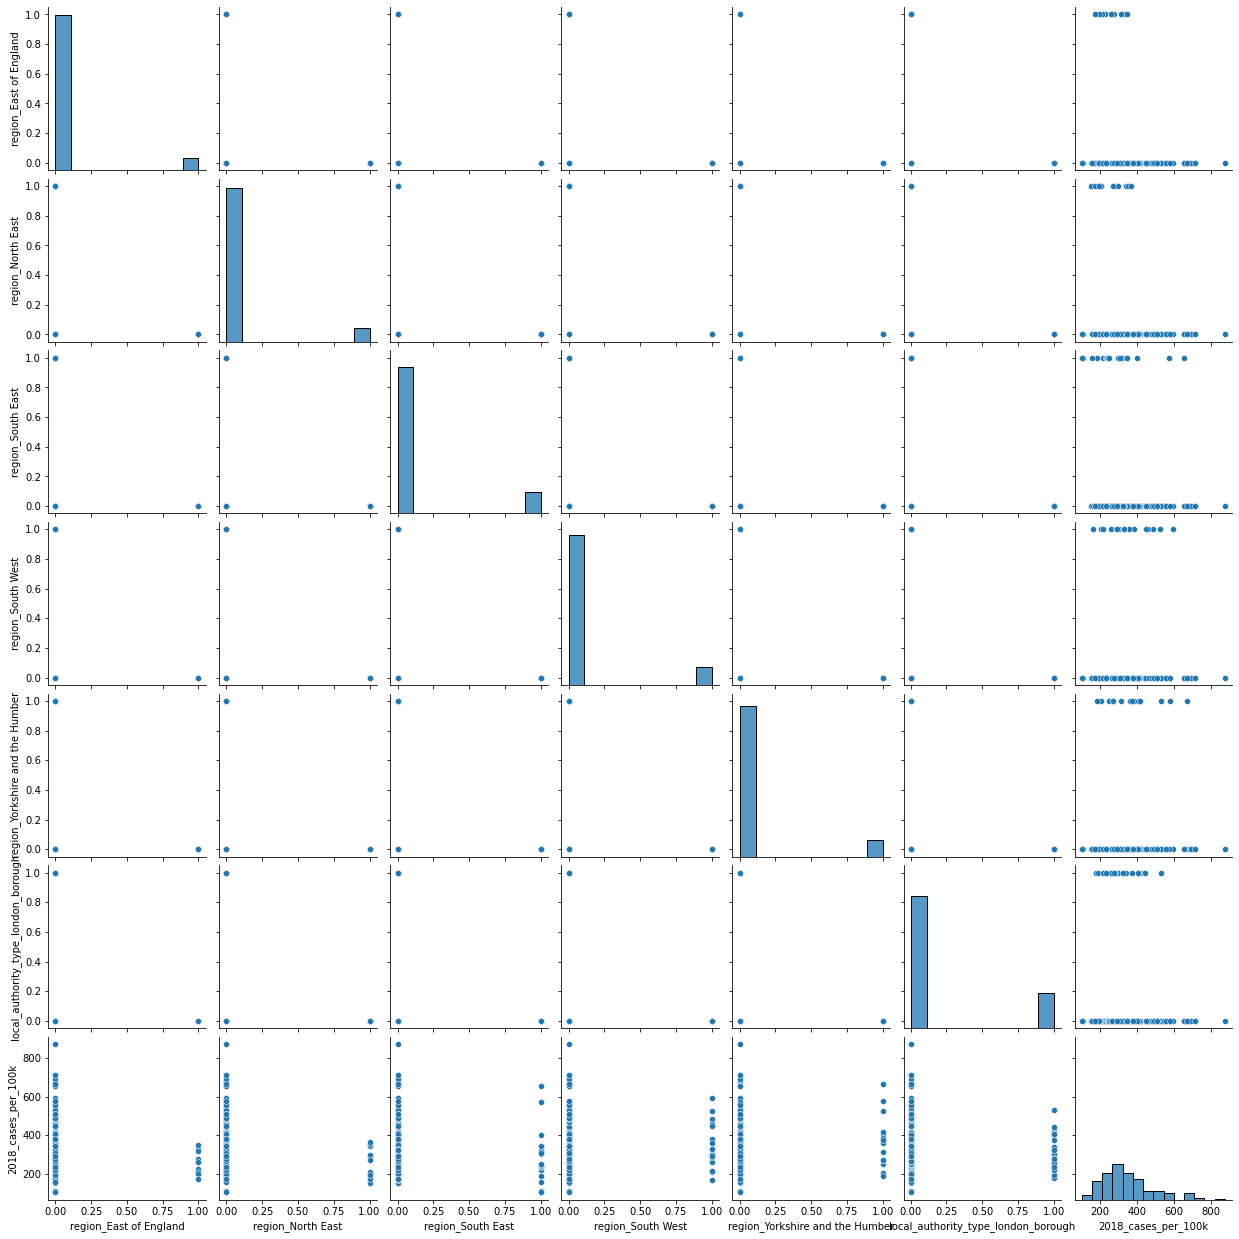

In [36]:
sns.pairplot(temp2)

#### Residual Analysis

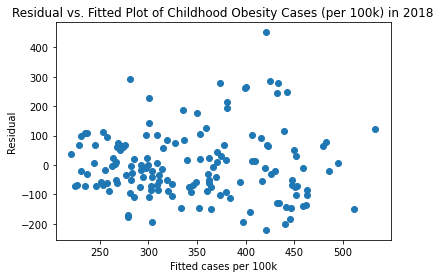

In [33]:
plt.scatter(model_mlr.fittedvalues, model_mlr.resid)
# adding title and labels
plt.xlabel('Fitted cases per 100k')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Childhood Obesity Cases (per 100k) in 2018')
plt.show()

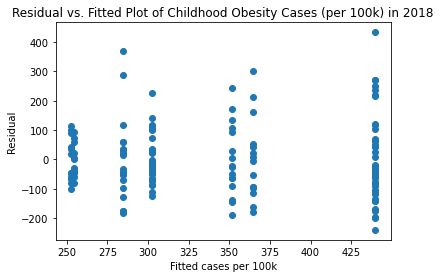

In [34]:
plt.scatter(model_mlr2.fittedvalues, model_mlr2.resid)
# adding title and labels
plt.xlabel('Fitted cases per 100k')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Childhood Obesity Cases (per 100k) in 2018')
plt.show()

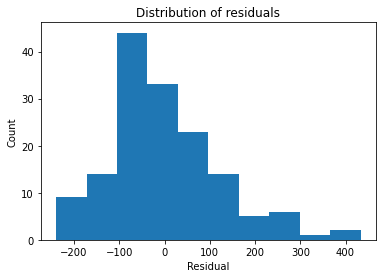

In [38]:
plt.hist(model_mlr2.resid)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Distribution of residuals')
plt.show()

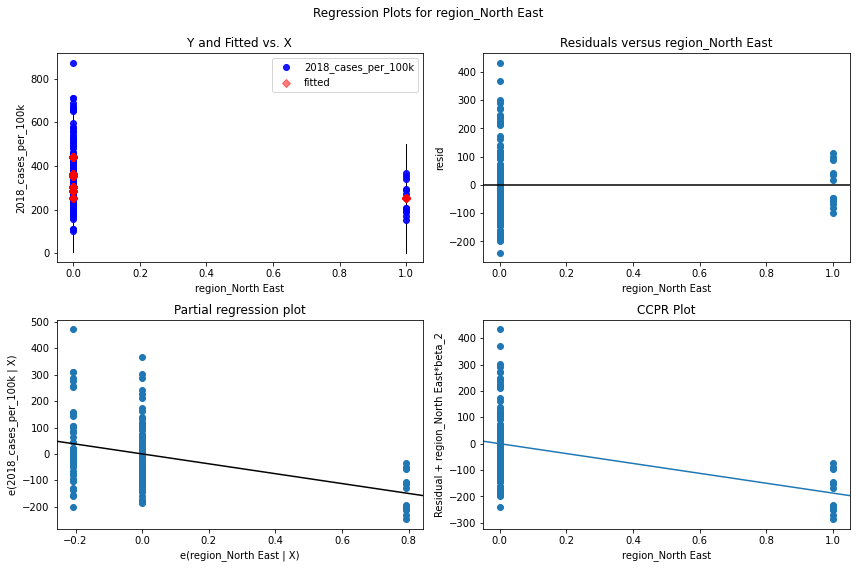

In [39]:
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(model_mlr2, 'region_North East', fig=fig)

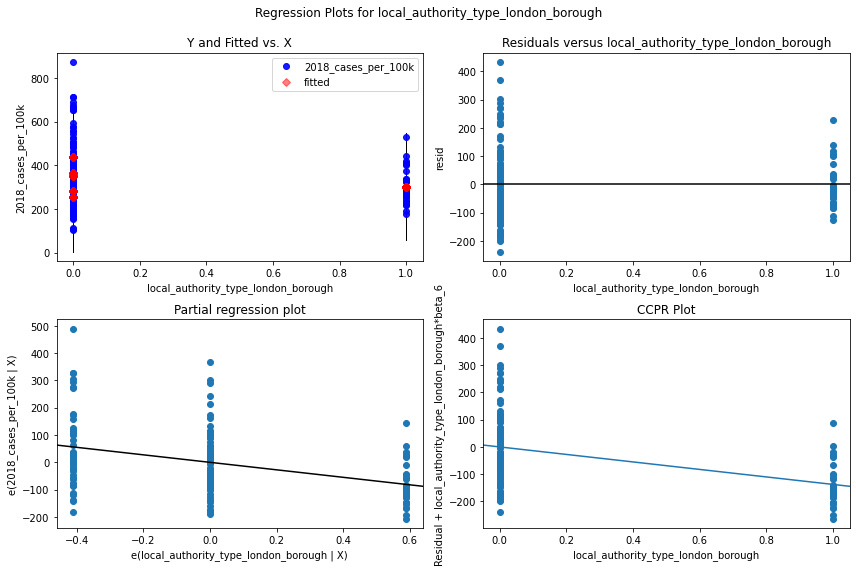

In [40]:
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(model_mlr2, 'local_authority_type_london_borough', fig=fig)

#### KS Distribution Test

<AxesSubplot:>

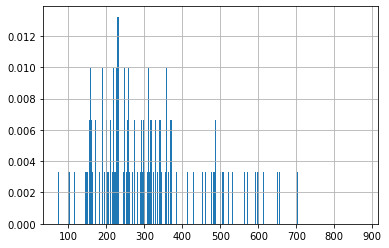

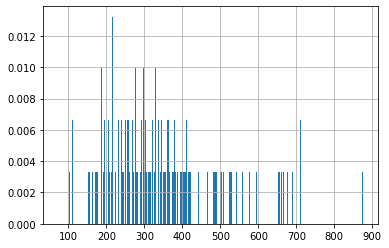

In [42]:
min1 = df['2008_cases_per_100k'].min()
min2 = df['2018_cases_per_100k'].min()

max1 = df['2008_cases_per_100k'].max()
max2 = df['2018_cases_per_100k'].max()

# Visualise the distribution of the data (as histograms)

# Set common x-limits for the histograms:
# (using int() is a trick to round to the integer below)
hist_min = int(min(min1,min2)) - 1
hist_max = int(max(max1,max2)) + 2
x_range = [hist_min, hist_max]

# Set common y-limits for the histograms:
# y_range = [0.0,0.4]

# Choose an appropriate number of columns for the histogram:
n_cols = int((hist_max - hist_min)/2)

# Now create the plots:
# (The plt.figure(x) functions create new plots preventing...
# ... both histograms from being drawn on the same axes.)

plt.figure(1)
df['2008_cases_per_100k'].hist(range=x_range, bins=n_cols, density=True)
# plt.ylim(y_range)

plt.figure(2)
# plt.ylim(y_range)
df['2018_cases_per_100k'].hist(range=x_range, bins=n_cols, density=True)


In [43]:
alpha = 0.05
KS_stat, p_value = sps.ks_2samp(df['2008_cases_per_100k'], df['2018_cases_per_100k'])

print("KS stat =", KS_stat)
print("p-value =", p_value)

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

KS stat = 0.17218543046357615
p-value = 0.02257191965694648
p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different distributions.


#### Mean Comparison Test

In [44]:
mean1 = df['2008_cases_per_100k'].mean()
mean2 = df['2018_cases_per_100k'].mean()
print(mean1)
print(mean2)

310.8451968953002
345.9752383364588


In [45]:
# There is a built-in scipy.stats function (ttest_ind) that does steps 3 and 4 for us.
# We just need to know whether we can assume that the samples are drawn...
# ... from populations with the same standard deviation or not.
# (Provided neither standard deviation is double the other, this should be ok)

std1 = df['2008_cases_per_100k'].std()
std2 = df['2018_cases_per_100k'].std()

std_ratio = std1/std2

print("std_ratio =", std_ratio)

if std_ratio > 0.5 and std_ratio < 2:
    print("Can assume equal population standard deviations.")
    equal_stds = True
else:
    print("Cannot assume equal population standard deviations.")
    equal_stds = False

std_ratio = 0.9897004725588947
Can assume equal population standard deviations.


In [46]:
test_stat, p_value = sps.ttest_ind(df['2008_cases_per_100k'], df['2018_cases_per_100k'], 
                                   equal_var = equal_stds, alternative = 'less')
print("p-value =", p_value)

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value = 0.013599312908085446
p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


In [ ]:
# for one-tailed test do we need to divide p by 2?
# If you want to test a one-sided hypothesis, but what you observe is in the opposite direction (e.g. testing H0:μ1>μ2 but observing x¯1<x¯2), your p-value is going to exceed 0.50. Running the hypothesis test in that case is unnecessary; you know you won’t be able to reject.

#### Spearman's Rank Correlation
https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/

In [48]:
from scipy.stats import spearmanr

coef, p = spearmanr(df['2018_spending_per_pax'] * 100000, df['2018_cases_per_100k'])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.087
Samples are uncorrelated (fail to reject H0) p=0.290


In [ ]:
#more robust to outliers